In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import koreanize_matplotlib
import seaborn as sns 
import tensorflow as tf 
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.utils import to_categorical 

In [2]:
# 패션 MNIST 데이터셋 로딩 
data = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = data.load_data()

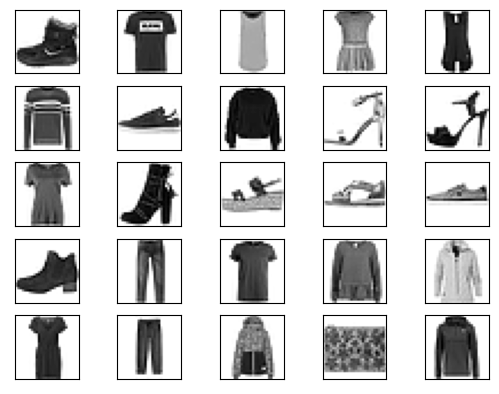

In [3]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap=plt.cm.binary)
plt.show()

## CNN 사용하지 않고 분류해보기 

In [4]:
X_train,X_test = X_train / 255.0 , X_test / 255.0 

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2)) # 20%만 조정 
model.add(Dense(10,activation="softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=20)
model.evaluate(X_test,y_test,verbose=2)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5316 - accuracy: 0.8128
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4036 - accuracy: 0.8549
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3669 - accuracy: 0.8675
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3458 - accuracy: 0.8728
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3307 - accuracy: 0.8767
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3180 - accuracy: 0.8821
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3094 - accuracy: 0.8838
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3001 - accuracy: 0.8893
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2921 - accuracy: 0.8913
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.284

[0.3298470079898834, 0.8885999917984009]

## CNN으로 Fashion MNIST 분석하기

In [6]:
X_train.reshape(-1,28,28,1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [7]:
X_train_final = X_train.reshape(-1,28,28,1) / 255.0
X_test_final = X_test.reshape(-1,28,28,1) / 255.0

In [8]:
model_with_conv = Sequential() 
model_with_conv.add(Conv2D(32,(3,3),padding="same",activation = "relu",input_shape=(28,28,1)))
model_with_conv.add(MaxPooling2D((2,2),strides=2))
model_with_conv.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model_with_conv.add(MaxPooling2D((2,2),strides=2))
model_with_conv.add(Flatten())
model_with_conv.add(Dense(128,activation="relu"))
model_with_conv.add(Dense(10,activation="softmax")) # 출력층 

model_with_conv.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model_with_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [9]:
model_with_conv.fit(X_train_final,y_train,epochs=10)
model_with_conv.evaluate(X_test_final,y_test,verbose=2)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.8463 - accuracy: 0.6916
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5482 - accuracy: 0.7973
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4771 - accuracy: 0.8263
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4370 - accuracy: 0.8419
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4105 - accuracy: 0.8524
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3870 - accuracy: 0.8602
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3737 - accuracy: 0.8640
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3586 - accuracy: 0.8686
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3460 - accuracy: 0.8745
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - los

[0.3616548478603363, 0.8722000122070312]

### 전이학습 
* 대량의 데이터 셋을 이용하여 사전에 학습하고 만들어진 모델의 가중치를 가져와 우리가 원하는 분석의 활용하는 것을 이야기함 
* 사전 훈련된 모델을 가져와서 커스터 마이징 하는 것을 Fine-Tuning이라고 한다.
------
### 전이학습의 기법

1) 특성 추출법 : 사전 훈련된 모델을 가져온 후, 마지막 완전연결층 부분만 샐 만듬 
    * 1-1) 합성곱층 : 합성곱층과 플링층으로 구성 
    * 1-2) 완전연결층 : 데이터 분류기, 추출된 특성으로 입력 받아 최종적으로 이미지 분류를 수행 
    * 1-3) 모델 종류 : Xception , Inception V3, ResNet50, VGG16, VGG19, MobileNet

## ResNet50 모델을 사용 
* 목표 : 개와 고양이를 분류하는 작업을 실시 

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg 

In [11]:
base_model = ResNet50(include_top=True,weights='imagenet',input_tensor=None, input_shape=None, 
                     pooling=None,classes=1000)


In [12]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

## 이미 학습이 완료가 된 데이터셋 
* 그 안에 우리의 모델을 추가해준다

In [13]:
model.trainable = False
model = Sequential()
model.add(base_model)
model.add(Dense(2,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_4 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 25,585,594
Non-trainable params: 53,120
_________________________________________________________________


In [14]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
modelpath = "./deep_model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
check_pointer = ModelCheckpoint(filepath=modelpath, verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss",patience=100)

In [23]:
batch_size = 16
image_height = 224
image_width = 224 
train_dir = "./catanddog/train/"
test_dir = "./catanddog/validation/"


## 다양한 이미지 샘플을 만들기 위한 이미지 변형 작업

In [24]:
train = ImageDataGenerator(
    rescale=1./255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator = train.flow_from_directory(
    train_dir, 
    target_size=(image_height,image_width),
    color_mode='rgb',
    batch_size=batch_size,
    seed= 1,
    shuffle=True,
    class_mode = "categorical")

valid = ImageDataGenerator(rescale=1./255.0)
valid_generator = valid.flow_from_directory(
    test_dir,
    target_size=(image_height,image_width),
    color_mode='rgb',
    batch_size=batch_size,
    seed= 1,
    shuffle=True,
    class_mode = "categorical"
)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [25]:
history = model.fit(train_generator,epochs=2000,validation_data=valid_generator,verbose=2,
                   callbacks=[early_stopping_callback,check_pointer])

Epoch 1/2000

Epoch 1: val_loss improved from inf to 0.69362, saving model to ./deep_model\01-0.5000.hdf5
25/25 - 15s - loss: 0.6847 - accuracy: 0.6701 - val_loss: 0.6936 - val_accuracy: 0.5000 - 15s/epoch - 611ms/step
Epoch 2/2000

Epoch 2: val_loss did not improve from 0.69362
25/25 - 11s - loss: 0.6888 - accuracy: 0.5299 - val_loss: 0.6938 - val_accuracy: 0.5000 - 11s/epoch - 459ms/step
Epoch 3/2000

Epoch 3: val_loss did not improve from 0.69362
25/25 - 11s - loss: 0.6898 - accuracy: 0.5636 - val_loss: 0.6940 - val_accuracy: 0.5000 - 11s/epoch - 458ms/step
Epoch 4/2000

Epoch 4: val_loss did not improve from 0.69362
25/25 - 11s - loss: 0.6904 - accuracy: 0.5558 - val_loss: 0.6943 - val_accuracy: 0.5000 - 11s/epoch - 459ms/step
Epoch 5/2000

Epoch 5: val_loss did not improve from 0.69362
25/25 - 11s - loss: 0.6893 - accuracy: 0.5844 - val_loss: 0.6943 - val_accuracy: 0.5000 - 11s/epoch - 459ms/step
Epoch 6/2000

Epoch 6: val_loss did not improve from 0.69362
25/25 - 11s - loss: 0.68

Epoch 45/2000

Epoch 45: val_loss did not improve from 0.64731
25/25 - 12s - loss: 0.6398 - accuracy: 0.6597 - val_loss: 0.6666 - val_accuracy: 0.6122 - 12s/epoch - 461ms/step
Epoch 46/2000

Epoch 46: val_loss did not improve from 0.64731
25/25 - 11s - loss: 0.6398 - accuracy: 0.6338 - val_loss: 0.6970 - val_accuracy: 0.6122 - 11s/epoch - 455ms/step
Epoch 47/2000

Epoch 47: val_loss did not improve from 0.64731
25/25 - 11s - loss: 0.6484 - accuracy: 0.6078 - val_loss: 0.7664 - val_accuracy: 0.5204 - 11s/epoch - 459ms/step
Epoch 48/2000

Epoch 48: val_loss did not improve from 0.64731
25/25 - 11s - loss: 0.6244 - accuracy: 0.6623 - val_loss: 0.6945 - val_accuracy: 0.5918 - 11s/epoch - 452ms/step
Epoch 49/2000

Epoch 49: val_loss did not improve from 0.64731
25/25 - 11s - loss: 0.6367 - accuracy: 0.6390 - val_loss: 0.6649 - val_accuracy: 0.6327 - 11s/epoch - 452ms/step
Epoch 50/2000

Epoch 50: val_loss did not improve from 0.64731
25/25 - 11s - loss: 0.6290 - accuracy: 0.6494 - val_loss:

Epoch 91/2000

Epoch 91: val_loss did not improve from 0.60400
25/25 - 11s - loss: 0.6171 - accuracy: 0.6675 - val_loss: 0.6913 - val_accuracy: 0.5816 - 11s/epoch - 452ms/step
Epoch 92/2000

Epoch 92: val_loss did not improve from 0.60400
25/25 - 11s - loss: 0.6425 - accuracy: 0.6312 - val_loss: 0.6682 - val_accuracy: 0.5918 - 11s/epoch - 451ms/step
Epoch 93/2000

Epoch 93: val_loss did not improve from 0.60400
25/25 - 11s - loss: 0.6290 - accuracy: 0.6416 - val_loss: 0.7809 - val_accuracy: 0.5000 - 11s/epoch - 453ms/step
Epoch 94/2000

Epoch 94: val_loss did not improve from 0.60400
25/25 - 11s - loss: 0.6398 - accuracy: 0.6156 - val_loss: 0.7840 - val_accuracy: 0.5306 - 11s/epoch - 454ms/step
Epoch 95/2000

Epoch 95: val_loss did not improve from 0.60400
25/25 - 11s - loss: 0.6536 - accuracy: 0.6026 - val_loss: 0.7593 - val_accuracy: 0.5612 - 11s/epoch - 451ms/step
Epoch 96/2000

Epoch 96: val_loss did not improve from 0.60400
25/25 - 11s - loss: 0.6143 - accuracy: 0.6494 - val_loss:

Epoch 137/2000

Epoch 137: val_loss did not improve from 0.58744
25/25 - 11s - loss: 0.5853 - accuracy: 0.6987 - val_loss: 0.6179 - val_accuracy: 0.6939 - 11s/epoch - 457ms/step
Epoch 138/2000

Epoch 138: val_loss did not improve from 0.58744
25/25 - 12s - loss: 0.5716 - accuracy: 0.7039 - val_loss: 0.6882 - val_accuracy: 0.6020 - 12s/epoch - 461ms/step
Epoch 139/2000

Epoch 139: val_loss did not improve from 0.58744
25/25 - 11s - loss: 0.5795 - accuracy: 0.7169 - val_loss: 0.6003 - val_accuracy: 0.6735 - 11s/epoch - 449ms/step
Epoch 140/2000

Epoch 140: val_loss did not improve from 0.58744
25/25 - 11s - loss: 0.5461 - accuracy: 0.7455 - val_loss: 0.6120 - val_accuracy: 0.7041 - 11s/epoch - 451ms/step
Epoch 141/2000

Epoch 141: val_loss improved from 0.58744 to 0.58336, saving model to ./deep_model\141-0.6939.hdf5
25/25 - 12s - loss: 0.5388 - accuracy: 0.7429 - val_loss: 0.5834 - val_accuracy: 0.6939 - 12s/epoch - 489ms/step
Epoch 142/2000

Epoch 142: val_loss did not improve from 0.5

Epoch 183/2000

Epoch 183: val_loss did not improve from 0.56196
25/25 - 11s - loss: 0.5281 - accuracy: 0.7584 - val_loss: 0.8232 - val_accuracy: 0.5408 - 11s/epoch - 454ms/step
Epoch 184/2000

Epoch 184: val_loss did not improve from 0.56196
25/25 - 11s - loss: 0.5285 - accuracy: 0.7662 - val_loss: 0.7862 - val_accuracy: 0.5612 - 11s/epoch - 453ms/step
Epoch 185/2000

Epoch 185: val_loss did not improve from 0.56196
25/25 - 11s - loss: 0.5880 - accuracy: 0.7117 - val_loss: 0.7599 - val_accuracy: 0.5714 - 11s/epoch - 452ms/step
Epoch 186/2000

Epoch 186: val_loss did not improve from 0.56196
25/25 - 11s - loss: 0.5576 - accuracy: 0.7377 - val_loss: 0.7201 - val_accuracy: 0.6020 - 11s/epoch - 445ms/step
Epoch 187/2000

Epoch 187: val_loss did not improve from 0.56196
25/25 - 11s - loss: 0.4892 - accuracy: 0.7896 - val_loss: 0.6836 - val_accuracy: 0.6429 - 11s/epoch - 452ms/step
Epoch 188/2000

Epoch 188: val_loss did not improve from 0.56196
25/25 - 11s - loss: 0.5357 - accuracy: 0.7636

Epoch 229/2000

Epoch 229: val_loss did not improve from 0.55176
25/25 - 11s - loss: 0.4816 - accuracy: 0.8078 - val_loss: 0.6844 - val_accuracy: 0.6633 - 11s/epoch - 451ms/step
Epoch 230/2000

Epoch 230: val_loss did not improve from 0.55176
25/25 - 11s - loss: 0.4484 - accuracy: 0.8104 - val_loss: 0.6879 - val_accuracy: 0.6735 - 11s/epoch - 459ms/step
Epoch 231/2000

Epoch 231: val_loss did not improve from 0.55176
25/25 - 11s - loss: 0.4091 - accuracy: 0.8494 - val_loss: 0.7306 - val_accuracy: 0.6429 - 11s/epoch - 452ms/step
Epoch 232/2000

Epoch 232: val_loss did not improve from 0.55176
25/25 - 11s - loss: 0.3963 - accuracy: 0.8468 - val_loss: 0.8220 - val_accuracy: 0.6224 - 11s/epoch - 455ms/step
Epoch 233/2000

Epoch 233: val_loss did not improve from 0.55176
25/25 - 12s - loss: 0.3893 - accuracy: 0.8519 - val_loss: 0.7660 - val_accuracy: 0.6122 - 12s/epoch - 460ms/step
Epoch 234/2000

Epoch 234: val_loss did not improve from 0.55176
25/25 - 12s - loss: 0.3771 - accuracy: 0.8545


Epoch 275: val_loss did not improve from 0.55176
25/25 - 11s - loss: 0.5385 - accuracy: 0.7195 - val_loss: 0.6287 - val_accuracy: 0.6939 - 11s/epoch - 458ms/step
Epoch 276/2000

Epoch 276: val_loss did not improve from 0.55176
25/25 - 11s - loss: 0.5272 - accuracy: 0.7013 - val_loss: 0.6855 - val_accuracy: 0.5714 - 11s/epoch - 454ms/step
Epoch 277/2000

Epoch 277: val_loss did not improve from 0.55176
25/25 - 11s - loss: 0.5659 - accuracy: 0.6909 - val_loss: 0.6008 - val_accuracy: 0.7551 - 11s/epoch - 458ms/step
Epoch 278/2000

Epoch 278: val_loss did not improve from 0.55176
25/25 - 12s - loss: 0.5485 - accuracy: 0.7247 - val_loss: 0.6028 - val_accuracy: 0.7143 - 12s/epoch - 461ms/step
Epoch 279/2000

Epoch 279: val_loss did not improve from 0.55176
25/25 - 12s - loss: 0.5434 - accuracy: 0.6987 - val_loss: 0.6183 - val_accuracy: 0.6939 - 12s/epoch - 461ms/step
Epoch 280/2000

Epoch 280: val_loss did not improve from 0.55176
25/25 - 12s - loss: 0.4927 - accuracy: 0.7455 - val_loss: 0.

Epoch 321/2000

Epoch 321: val_loss did not improve from 0.51079
25/25 - 12s - loss: 0.5056 - accuracy: 0.7870 - val_loss: 0.9910 - val_accuracy: 0.6122 - 12s/epoch - 462ms/step
Epoch 322/2000

Epoch 322: val_loss did not improve from 0.51079
25/25 - 11s - loss: 0.4665 - accuracy: 0.8000 - val_loss: 0.8019 - val_accuracy: 0.6633 - 11s/epoch - 459ms/step
Epoch 323/2000

Epoch 323: val_loss did not improve from 0.51079
25/25 - 11s - loss: 0.4712 - accuracy: 0.7870 - val_loss: 0.6911 - val_accuracy: 0.6939 - 11s/epoch - 452ms/step
Epoch 324/2000

Epoch 324: val_loss did not improve from 0.51079
25/25 - 11s - loss: 0.5761 - accuracy: 0.7273 - val_loss: 0.9545 - val_accuracy: 0.5510 - 11s/epoch - 450ms/step
Epoch 325/2000

Epoch 325: val_loss did not improve from 0.51079
25/25 - 12s - loss: 0.5634 - accuracy: 0.7091 - val_loss: 1.0402 - val_accuracy: 0.5408 - 12s/epoch - 466ms/step
Epoch 326/2000

Epoch 326: val_loss did not improve from 0.51079
25/25 - 11s - loss: 0.4998 - accuracy: 0.7558


Epoch 367: val_loss did not improve from 0.51079
25/25 - 11s - loss: 0.4007 - accuracy: 0.8260 - val_loss: 0.6951 - val_accuracy: 0.7245 - 11s/epoch - 453ms/step
Epoch 368/2000

Epoch 368: val_loss did not improve from 0.51079
25/25 - 11s - loss: 0.3511 - accuracy: 0.8545 - val_loss: 0.6928 - val_accuracy: 0.7245 - 11s/epoch - 452ms/step
Epoch 369/2000

Epoch 369: val_loss did not improve from 0.51079
25/25 - 11s - loss: 0.3488 - accuracy: 0.8623 - val_loss: 0.6122 - val_accuracy: 0.7551 - 11s/epoch - 452ms/step
Epoch 370/2000

Epoch 370: val_loss did not improve from 0.51079
25/25 - 11s - loss: 0.3178 - accuracy: 0.8831 - val_loss: 0.5912 - val_accuracy: 0.7551 - 11s/epoch - 455ms/step
Epoch 371/2000

Epoch 371: val_loss did not improve from 0.51079
25/25 - 12s - loss: 0.3229 - accuracy: 0.8675 - val_loss: 0.6252 - val_accuracy: 0.7245 - 12s/epoch - 460ms/step
Epoch 372/2000

Epoch 372: val_loss did not improve from 0.51079
25/25 - 11s - loss: 0.2411 - accuracy: 0.9247 - val_loss: 0.

Epoch 413/2000

Epoch 413: val_loss did not improve from 0.46039
25/25 - 12s - loss: 0.1989 - accuracy: 0.9377 - val_loss: 0.6974 - val_accuracy: 0.7143 - 12s/epoch - 464ms/step
Epoch 414/2000

Epoch 414: val_loss did not improve from 0.46039
25/25 - 12s - loss: 0.1934 - accuracy: 0.9429 - val_loss: 0.6500 - val_accuracy: 0.7347 - 12s/epoch - 460ms/step
Epoch 415/2000

Epoch 415: val_loss did not improve from 0.46039
25/25 - 11s - loss: 0.2335 - accuracy: 0.9169 - val_loss: 0.6423 - val_accuracy: 0.7245 - 11s/epoch - 459ms/step
Epoch 416/2000

Epoch 416: val_loss did not improve from 0.46039
25/25 - 11s - loss: 0.2026 - accuracy: 0.9429 - val_loss: 0.7907 - val_accuracy: 0.6735 - 11s/epoch - 458ms/step
Epoch 417/2000

Epoch 417: val_loss did not improve from 0.46039
25/25 - 11s - loss: 0.2438 - accuracy: 0.9039 - val_loss: 0.6877 - val_accuracy: 0.6939 - 11s/epoch - 454ms/step
Epoch 418/2000

Epoch 418: val_loss did not improve from 0.46039
25/25 - 11s - loss: 0.1777 - accuracy: 0.9403


Epoch 459: val_loss did not improve from 0.46039
25/25 - 11s - loss: 0.2419 - accuracy: 0.8753 - val_loss: 0.8563 - val_accuracy: 0.6735 - 11s/epoch - 459ms/step
Epoch 460/2000

Epoch 460: val_loss did not improve from 0.46039
25/25 - 11s - loss: 0.2319 - accuracy: 0.9091 - val_loss: 0.6944 - val_accuracy: 0.7449 - 11s/epoch - 455ms/step
Epoch 461/2000

Epoch 461: val_loss did not improve from 0.46039
25/25 - 12s - loss: 0.2146 - accuracy: 0.9013 - val_loss: 0.8186 - val_accuracy: 0.6633 - 12s/epoch - 463ms/step
Epoch 462/2000

Epoch 462: val_loss did not improve from 0.46039
25/25 - 12s - loss: 0.2329 - accuracy: 0.9091 - val_loss: 0.7199 - val_accuracy: 0.7143 - 12s/epoch - 464ms/step
Epoch 463/2000

Epoch 463: val_loss did not improve from 0.46039
25/25 - 12s - loss: 0.2372 - accuracy: 0.8883 - val_loss: 0.9853 - val_accuracy: 0.6327 - 12s/epoch - 461ms/step
Epoch 464/2000

Epoch 464: val_loss did not improve from 0.46039
25/25 - 11s - loss: 0.2497 - accuracy: 0.9065 - val_loss: 0.

Text(0.5, 1.0, '오차')

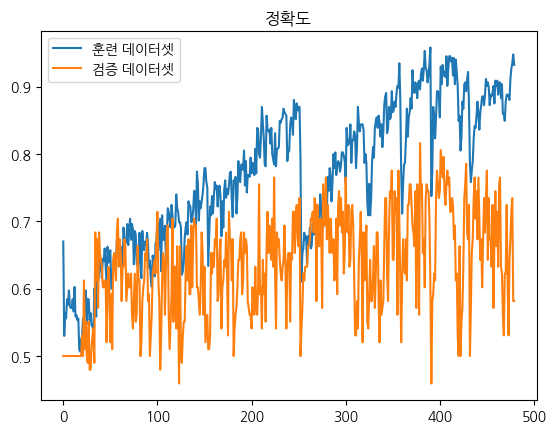

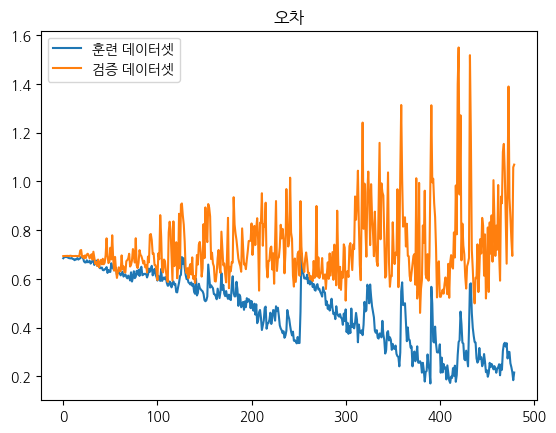

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,label="훈련 데이터셋")
plt.plot(epochs,val_accuracy,label="검증 데이터셋")
plt.legend()
plt.title("정확도")
plt.figure()

plt.plot(epochs,loss,label="훈련 데이터셋")
plt.plot(epochs,val_loss,label="검증 데이터셋")
plt.legend()
plt.title("오차")

1/1 [==============================] - 1s 1s/step


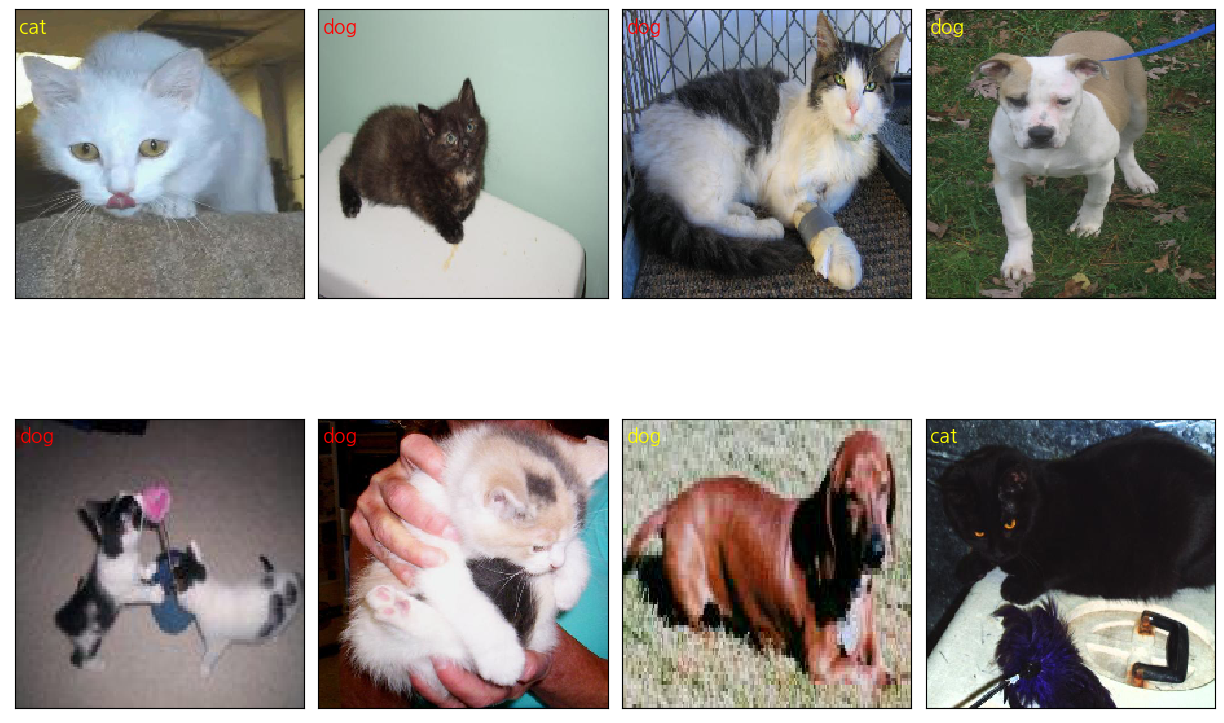

In [27]:
class_names = ['cat','dog']
validation,label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values,axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4,i + 1, xticks=[],yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r,interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3,17,class_names[prediction_values[i]],color="yellow",fontsize=14)
    else:
        ax.text(3,17,class_names[prediction_values[i]],color="red",fontsize=14)

In [28]:
import tensorflow_hub as hub
model = tf.keras.Sequential()
model.add(hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False))
model.add(Dense(2, activation='softmax'))

## 나머지는 다음에 GPU 불탄다 ...